In [12]:
import pandas as pd
data=pd.read_csv('Cell_stats_sim_1.csv')
data.columns = ['time', 'time_of_day','cell_id','cell_energy_pool','krat_pop','krat_energy','snake_pop','snake_energy']

In [13]:
data.head()

,time,time_of_day,cell_id,cell_energy_pool,krat_pop,krat_energy,snake_pop,snake_energy
0,0,0,"(0, 1)",2200,0,0,0,0
1,0,0,"(0, 2)",2200,0,0,0,0
2,0,0,"(0, 3)",2200,0,0,0,0
3,0,0,"(0, 4)",2198,1,31,0,0
4,0,0,"(0, 5)",2200,0,0,0,0


In [14]:
data_initial_time= data['time']== min(data['time'])
data_initial_time = data[data_initial_time]
initial_time = data_initial_time['time'].max()
initial_krat_pop = data_initial_time['krat_pop'].sum()
initial_snake_pop = data_initial_time['snake_pop'].sum()
avg_cell_energy = data_initial_time['cell_energy_pool'].sum()/len(data_initial_time['cell_energy_pool'])
prompt = 'time: {}, Avg Cell Energy {}, Krats {}, Snakes {}'.format(initial_time,avg_cell_energy,initial_krat_pop,initial_snake_pop)
print('Initial Stats')
print(prompt)

data_final_time= data['time']== max(data['time'])
data_final_time = data[data_final_time]
final_time = data_final_time['time'].max()
final_krat_pop = data_final_time['krat_pop'].sum()
final_snake_pop = data_final_time['snake_pop'].sum()
avg_cell_energy = data_final_time['cell_energy_pool'].sum()/len(data_final_time['cell_energy_pool'])
prompt = 'time: {}, Avg Cell Energy {}, Krats {}, Snakes {}'.format(final_time,avg_cell_energy,final_krat_pop,final_snake_pop)
print('Final Stats')
print(prompt)


Initial Stats
time: 0, Avg Cell Energy 2199.4556962025317, Krats 19, Snakes 3
Final Stats
time: 23, Avg Cell Energy 2194.85, Krats 18, Snakes 3


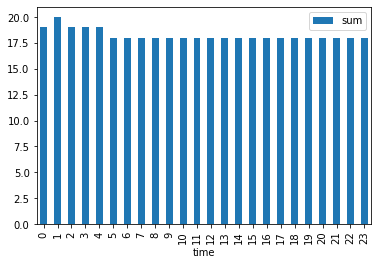

In [15]:
data.groupby('time')['krat_pop'].agg(['sum']).plot(kind='bar')
#

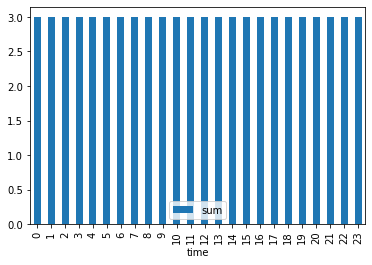

In [16]:
data.groupby('time')['snake_pop'].agg(['sum']).plot(kind='bar')

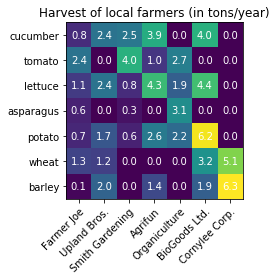

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [11]:
time = data['time']
cells = data['cell_id'].unique()
krat_counts = data['krat_pop']
krats = np.reshape(krat_counts,(len(cells), len(time)))
print(krats)


AttributeError: 'Series' object has no attribute 'reshape'